In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster.hierarchy import dendrogram, linkage
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [2]:
happiness_report = "econ_happy_data_allyears.csv"

In [3]:
happiness_report_df = pd.read_csv(happiness_report)

In [4]:
happiness_report_df.head()

,Unnamed: 0,Avg. Wages (Annual),Avg. Work Hours (Annual),Confidence in national government,Delivery Quality,Democratic Quality,Freedom to make life choices,GDP (constant 2010 US$),Healthy life expectancy at birth,Happiness Index,Log GDP per capita,Negative affect,Perceptions of corruption,Population density,Positive affect,Probability of dying at age 5-14,Social support,Standard deviation of ladder,Gini household income
0,0,52252,1699,0,1,1,0,1144260000000,72,7,10,0,0,2,0,1,0,1,0
1,1,50096,1557,0,1,1,0,391893000000,71,7,10,0,0,101,0,1,0,1,0
2,2,50872,1546,0,1,1,0,483548000000,70,6,10,0,0,359,0,1,0,1,0
3,3,45502,1715,0,1,1,0,1613460000000,72,7,10,0,0,3,0,1,0,1,0
4,4,24960,2070,0,1,0,0,218538000000,68,6,9,0,0,22,0,1,0,2,0


In [5]:
happiness_report_df.dropna()

,Unnamed: 0,Avg. Wages (Annual),Avg. Work Hours (Annual),Confidence in national government,Delivery Quality,Democratic Quality,Freedom to make life choices,GDP (constant 2010 US$),Healthy life expectancy at birth,Happiness Index,Log GDP per capita,Negative affect,Perceptions of corruption,Population density,Positive affect,Probability of dying at age 5-14,Social support,Standard deviation of ladder,Gini household income
0,0,52252,1699,0,1,1,0,1144260000000,72,7,10,0,0,2,0,1,0,1,0
1,1,50096,1557,0,1,1,0,391893000000,71,7,10,0,0,101,0,1,0,1,0
2,2,50872,1546,0,1,1,0,483548000000,70,6,10,0,0,359,0,1,0,1,0
3,3,45502,1715,0,1,1,0,1613460000000,72,7,10,0,0,3,0,1,0,1,0
4,4,24960,2070,0,1,0,0,218538000000,68,6,9,0,0,22,0,1,0,2,0
5,5,22944,1800,0,0,1,0,207478000000,68,6,10,0,0,135,0,1,0,1,0
6,6,44451,1389,0,1,1,0,3417090000000,70,6,10,0,0,234,0,0,0,1,0
7,7,52263,1422,0,2,1,0,321995000000,70,7,10,0,0,130,0,0,0,1,0
8,8,41034,1710,0,1,0,0,1431620000000,72,6,10,0,0,93,0,1,0,1,0
9,9,43535,1592,0,2,1,0,247800000000,70,7,10,0,0,17,0,1,0,1,0


In [6]:
happiness_report_df.columns

Index(['Unnamed: 0', 'Avg. Wages (Annual)', 'Avg. Work Hours (Annual)',
       'Confidence in national government', 'Delivery Quality',
       'Democratic Quality', 'Freedom to make life choices',
       'GDP (constant 2010 US$)', 'Healthy life expectancy at birth',
       'Happiness Index', 'Log GDP per capita', 'Negative affect',
       'Perceptions of corruption', 'Population density', 'Positive affect',
       'Probability of dying at age 5-14', 'Social support',
       'Standard deviation of ladder', 'Gini household income'],
      dtype='object')

In [7]:
report_df=happiness_report_df.drop(columns={'Confidence in national government','Freedom to make life choices','Negative affect',
       'Perceptions of corruption','Social support','Gini household income','Positive affect'})
report_df.head()

,Unnamed: 0,Avg. Wages (Annual),Avg. Work Hours (Annual),Delivery Quality,Democratic Quality,GDP (constant 2010 US$),Healthy life expectancy at birth,Happiness Index,Log GDP per capita,Population density,Probability of dying at age 5-14,Standard deviation of ladder
0,0,52252,1699,1,1,1144260000000,72,7,10,2,1,1
1,1,50096,1557,1,1,391893000000,71,7,10,101,1,1
2,2,50872,1546,1,1,483548000000,70,6,10,359,1,1
3,3,45502,1715,1,1,1613460000000,72,7,10,3,1,1
4,4,24960,2070,1,0,218538000000,68,6,9,22,1,2


In [8]:
def correlation_matrix(report_df):
    plt.figure(figsize=(20,18))
    sns.heatmap(report_df.corr(), center=0, annot=True, cmap="RdBu_r", linewidths = .5, fmt='.2f',annot_kws={'size': 10})   

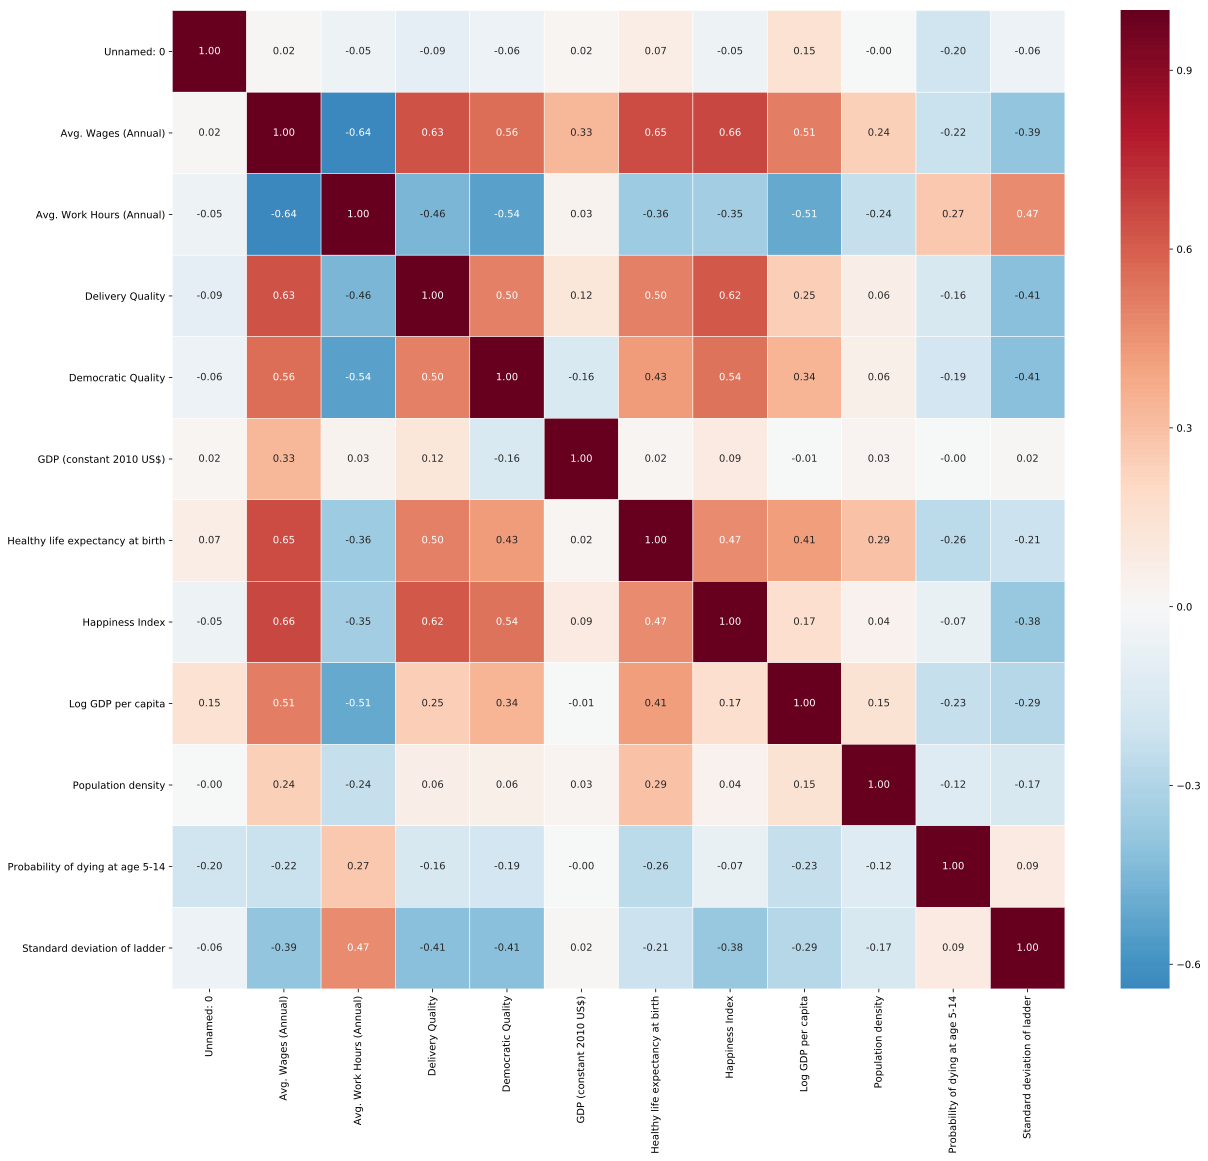

In [9]:
correlation_matrix(report_df)
plt.savefig("correlations_final.svg")

In [10]:
# First we prepare the data to use a model
y = report_df["Happiness Index"]
X = report_df.drop(["Happiness Index"], axis=1)

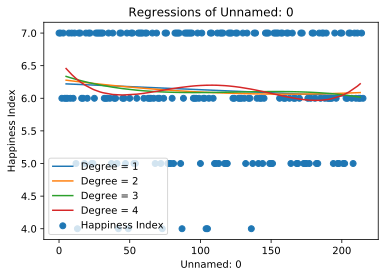

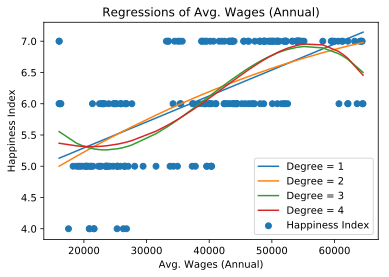

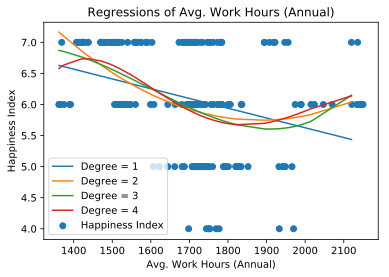

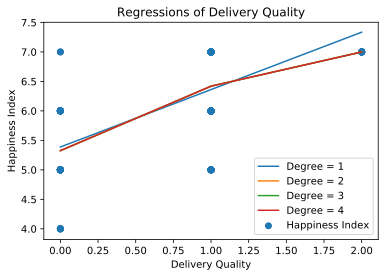

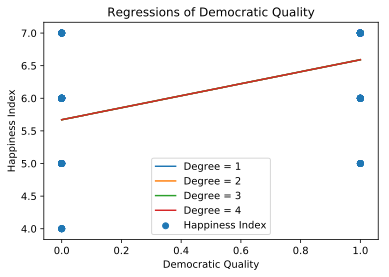

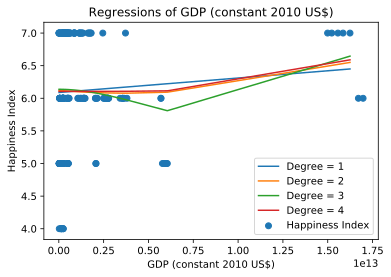

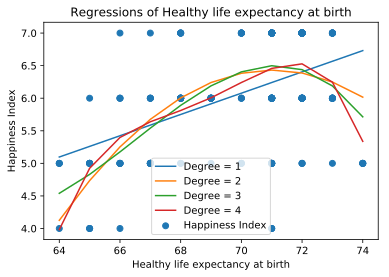

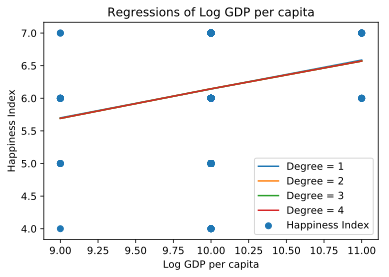

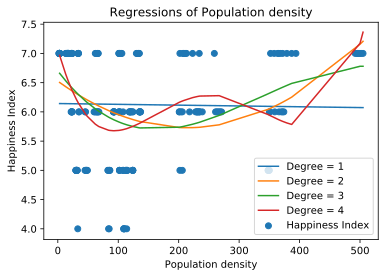

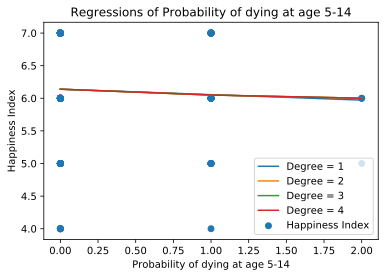

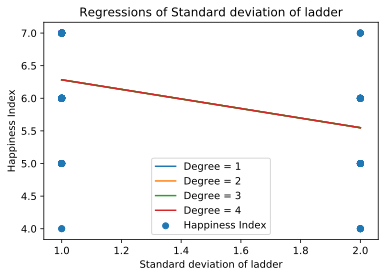

In [11]:
for feature in X.columns.values.tolist():
    X = report_df.drop(["Happiness Index"], axis=1)
    X = X[feature]
    X = X.values.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    plt.title("Regressions of " + feature)
    plt.scatter(X, y)

    degrees = [1,2,3,4]
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree)

        # transforms the existing features to higher degree features.
        X_train_poly = poly_features.fit_transform(X_train)

        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(X_train_poly, y_train)

        # predicting on test data-set
        y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

        # Plotting the regression

        new_x, new_y = zip(*sorted(zip(X_test, y_test_predict)))
        plt.plot(new_x, new_y, label="Degree = " + str(degree))

        plt.xlabel(feature)
        plt.ylabel("Happiness Index")
        plt.legend()
        plt.savefig("regressions1-17.svg")
    plt.show()
    plt.close()

C:\Users\carit\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\carit\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



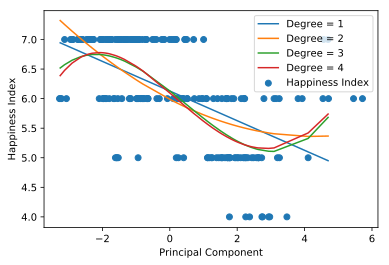

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# First we prepare the data to use a model
y = report_df["Happiness Index"]
X = report_df.drop(["Happiness Index"], axis=1)

# Normalisation and PCA
X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_norm)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

plt.scatter(X_pca, y)

degrees = [1,2,3,4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)

    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    # Plotting the regression
    new_x, new_y = zip(*sorted(zip(X_test, y_test_predict)))
    plt.plot(new_x, new_y, label="Degree = " + str(degree))
    plt.xlabel("Principal Component")
    plt.ylabel("Happiness Index")
    plt.legend()
    plt.savefig("PCA_final.svg")
plt.show()
plt.close()

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc=pca.fit_transform(report_df)
print(pca.explained_variance_ratio_)

[1.0000000e+00 1.8572436e-17]


In [14]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)
print("RMSE test (PCA): " + str(rmse_test))
print("R2square test (PCA): " + str(r2_test))

RMSE test (PCA): 0.6152858236126302
R2square test (PCA): 0.5185129228838863
